# Two photon emission rate of Rb-87 atom inside an optical cavity

This code calculates the two photon emission rate for rubidium-87 atom inside an optical cavity. The details of the physics is given in ref. [1]. This code uses lots of the libraries developed by https://arc-alkali-rydberg-calculator.readthedocs.io/en/latest/detailed_doc.html [2].

[1]. Generating heralded high-dimensional hyper-entangled photons using Rydberg atoms,...

[2]. N. Sibalic, J.D. Pritchard, C.S. Adams, and K.J.Weatherill, Arc: An open-source library for calculating properties of alkali rydberg atoms, Computer Physics Communications 220, 319-331 (2017).

This section derives the TPE rates for an atom inside an optical cavity with length, L and decay rate, $\kappa$. The density of optical modes around the atom (for each polarization) is modified by the cavity and is written as: $\rho_{cav} = \frac{1}{\pi}\sum_n \frac{\omega^2 \kappa}{(\omega_{cn}^2 -\omega^2)^2 +\omega^2 \kappa^2} = \frac{1}{\pi} \sum_n \frac{1/\kappa}{1+\Big(\frac{\omega_{cn}^2 -\omega^2}{\omega\kappa}\Big)^2}$, where $\omega_{cn}$ is the $n^{th}$ cavity mode frequency. The TPE rate thus is modified as:
\begin{align}\nonumber
\Gamma &= \frac{2\pi}{\hbar^4} \int d\omega_1 d\omega_2 \Big|\sum_m \frac{<f|H_{int}^{(2)}|m> <m|H_{int}^{(1)}|i>}{\omega_1 - \omega_{im}} + \frac{<f|H_{int}^{(1)}|m> <m|H_{int}^{(2)}|i>}{\omega_2 - \omega_{im}}\Big|^2 \sum_{n1,n2}  \frac{ \delta(\omega_1 + \omega_2 - \omega_{if})}{(\pi\kappa)^2 \Big[1 + \Big(\frac{\omega_{cn1}^2-\omega_1^2}{\omega_1 \kappa}\Big)^2\Big] \Big[1 + \Big(\frac{\omega_{cn2}^2-\omega_2^2}{\omega_2 \kappa}\Big)^2\Big]}
\end{align}

 Let us define, $y = \omega_1/\omega_{if}$, $y_{im} = \omega_{im}/\omega_{if}$, $y_{cn}=\omega_{cn}/\omega_{if}$ and $\Delta y = \kappa/\omega_{if}$
 
\begin{align}\nonumber
\Gamma   &=  \frac{k_0^5 e^4 a_0^4}{2\pi \hbar^2 c \epsilon_0^2} \Big( \frac{k_{if}}{k_0} \Big)^5 \Big( \frac{1}{V k_{if}^3} \Big)^2 \int_{0}^1 y (1-y) dy \sum_{n1,n2} \Big( \frac{\omega_{cn1}}{\kappa} \Big) \Big( \frac{\omega_{cn2}}{\kappa} \Big) \Big( \frac{\omega_{if}}{\omega_{cn1}} \Big) \Big( \frac{\omega_{if}}{\omega_{cn2}} \Big) \frac{1}{\Big[1 + \Big(\frac{y_{cn1}^2-y^2}{y \Delta y}\Big)^2\Big] \Big[1 + \Big(\frac{y_{cn2}^2-(1-y)^2}{(1-y) \Delta y}\Big)^2\Big]} \\
& \Big|\sum_m d_{fm} d_{mi} \Big( \frac{1}{y - y_{im}} + \frac{1}{1-y - y_{im}} \Big) \Big|^2 
\end{align}

The dipole moment matrix is in units of $e a_0$. The coefficient of TPE can be rewritten in terms of constants as:

\begin{align*}
C &=  \frac{k_0^5 e^4 a_0^4}{2\pi \hbar^2 c \epsilon_0^2} = \frac{9\pi^2 9 R_H \alpha^6 c}{2^{10}} = \frac{3^4 \pi^2 R_H \alpha^6 c}{2^{10}}
\end{align*}
The TPE rate can be written as:

\begin{align}
\Gamma  &= \frac{3^4 \pi^2 R_H \alpha^6 c}{2^{11}}\Big( \frac{k_{if}}{k_0} \Big)^5 \Big( \frac{1}{V k_{if}^3} \Big)^2 \int_{0}^1 y (1-y) dy \sum_{n1,n2} \Big( \frac{\omega_{cn1}}{\kappa} \Big) \Big( \frac{\omega_{cn2}}{\kappa} \Big)\Big( \frac{\omega_{if}}{\omega_{cn1}} \Big) \Big( \frac{\omega_{if}}{\omega_{cn2}} \Big) \frac{1}{\Big[1 + \Big(\frac{y_{cn1}^2-y^2}{y \Delta y}\Big)^2\Big] \Big[1 + \Big(\frac{y_{cn2}^2-(1-y)^2}{(1-y) \Delta y}\Big)^2\Big]} \\
&\Big|\sum_m d_{fm} d_{mi} \Big( \frac{1}{y - y_{im}} + \frac{1}{1-y - y_{im}} \Big) \Big|^2 
\end{align}



In [5]:
#This program is to connect with the library

# Configure the matplotlib graphics library and configure it to show 
# show figures inline in the notebook
%matplotlib inline               
import matplotlib.pyplot as plt  # Import library for direct plotting functions
import numpy as np               # Import Numerical Python
from IPython.core.display import display, HTML #Import HTML for formatting output

# NOTE: Uncomment following lines ONLY if you are not using installation via pip
import sys,os
rootDir = '/home/sutapa/ARC-Alkali-Rydberg-Calculator-2.0.5/' # e.g. '/Users/Username/Desktop/ARC-Alkali-Rydberg-Calculator'
sys.path.insert(0,rootDir)

from arc import *                 #Import ARC (Alkali Rydberg Calculator)

Depending on the cavity parameters, the cavity spectrum has been calculated below:

(0.46638499, 0.466385005)

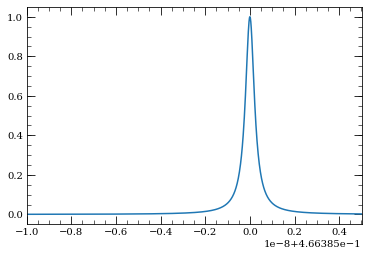

In [12]:
#del y;
atom=Rubidium87()# Here we define the atom for which the measurement is done.

# the initial state is defined in terms of (n,l,j)
n1 = 60         
l1 = 0          
j1=0.5  

# the final state is defined in terms of (n,l,j)
n2= 6
l2=0
j2=0.5

# different virtual states, m 
lm = 1
jm=1.5

# physical constants

e=1.6e-19; # electron charge
ħ=1.05e-34; # Plancks constant/ 2\pi
ωif = abs(atom.getEnergy(n2,l2,j2)-atom.getEnergy(n1,l1,j1))*e/ħ;   # energy difference between initial and final states
κ=200e3;      # cavity linewidth
Δy_c=2*np.pi*κ/ωif;   # Normalized cavity width, see the appendix of ref[1]
y_FSR=0.00747;        # Normalized cavity free spectral range

npeaks=10;            # No. of cavity resonances
y1=0.463              # first element of the normalized energy array 
yend=0.54             # last element of the normalized energy array
ny=int((yend-y1)*1e6); 
y=np.zeros(ny+npeaks*400000) # defining the normalized energy array
y[0]=y1;
ycn=np.zeros(npeaks+11)

c=1;

for n in range(0,10):
    ycn[n] = ((1-y_FSR)/2)-4*y_FSR + n*y_FSR;
    
ycn[10]=5;

nc=0;
# Here, we are defining the position of each cavity peaks
for k in range(1,ny):
    y[c]=y[c-1]+0.000001;
    c = c + 1;
    if y[c-1] < (ycn[nc]+0.000002) and y[c-1] > (ycn[nc]-0.000002):
        for j in range(0,400000):
            y[c]=y[c-1]+0.00000000001;
            c = c + 1;
        nc=nc+1;
f=0;

# cavity spectrum 
for n in range(0,npeaks):
    f = f+1/(1+((y**2 - ycn[n]**2)/(y*Δy_c))**2);

#Plot
plt.plot(y,f,'-')
#print(Δy_c)
plt.xlim(0.46638499,0.466385005)

In the code below, we are calculating the contribution of the TPE in free space which will be later added to the cavity spectrum.

In [7]:
from scipy.special import assoc_laguerre
from scipy.special import factorial
from scipy import integrate
import array as arr

# This function calculates the product of the dipole matrix for the transition from (n1,l1,j1) to (m,lm,jm) and the transition from (m,lm,jm) to (n2,l2,j2)
def kappa_cav(n1,l1,j1,n2,l2,j2,m,lm):
    kap_cav=(atom.getDipoleMatrixElement(n1,l1,j1,0.5,m,lm,1.5,1.5,1)*atom.getDipoleMatrixElement(m,lm,1.5,1.5,n2,l2,j2,0.5,-1))+\
        (atom.getDipoleMatrixElement(n1,l1,j1,0.5,m,lm,1.5,-0.5,-1)*atom.getDipoleMatrixElement(m,lm,1.5,-0.5,n2,l2,j2,0.5,1))+\
        (atom.getDipoleMatrixElement(n1,l1,j1,-0.5,m,lm,1.5,-1.5,-1)*atom.getDipoleMatrixElement(m,lm,1.5,-1.5,n2,l2,j2,-0.5,1))+\
        (atom.getDipoleMatrixElement(n1,l1,j1,-0.5,m,lm,1.5,0.5,1)*atom.getDipoleMatrixElement(m,lm,1.5,0.5,n2,l2,j2,-0.5,-1))+\
        (atom.getDipoleMatrixElement(n1,l1,j1,0.5,m,lm,0.5,-0.5,-1)*atom.getDipoleMatrixElement(m,lm,0.5,-0.5,n2,l2,j2,0.5,1))+\
        (atom.getDipoleMatrixElement(n1,l1,j1,-0.5,m,lm,0.5,0.5,1)*atom.getDipoleMatrixElement(m,lm,0.5,0.5,n2,l2,j2,-0.5,-1))
    return(abs(kap_cav))

def Mnr(y,ym):
    fm= 1/(y+ym)-(1/(y-1-ym))
    return(fm)

atom=Rubidium87()
atom1=Hydrogen()
n1 = 60
l1 = 0
j1=0.5
n2= 6
l2=0
j2=0.5
lm = 1
jm=1.5

R_H = 10973731.6
α = 1/137
c = 2.998e8
π = 3.1416
e=1.6e-19
ħ=1.05e-34

ratio = (atom.getEnergy(n1,l1,j1)-atom.getEnergy(n2,l2,j2))/(atom1.getEnergy(2,0,0.5)-atom1.getEnergy(1,0,0.5))
coefficient = 9/pow(2,10)*R_H*pow(α,6)*c*pow(ratio,5)
sumnr=0.0
#y= np.arange(0.463,0.54,0.000001);

for m in range(n1,n1+50):
    ym=(atom.getEnergy(m,lm,jm)-atom.getEnergy(n1,l1,j1))/(atom.getEnergy(n1,l1,j1)-atom.getEnergy(n2,l2,j2))
    kap=kappa_cav(n1,l1,j1,n2,l2,j2,m,lm)
    sumnr=sumnr+(Mnr(y,ym)*(kap))

#TPE spectrum for free atom

phi_free= coefficient*pow(y,3)*pow((1-y),3)*(sumnr*sumnr)

# we can calculate the TPE rates by integrating the spectrum in the defined normalized energy values

sum_int=0.0;
for i in range(1,len(y)-1):
    sum_int+=phi_free[i]*(y[i+1]-y[i-1])/2
Anr_free=sum_int/2

print(Anr_free)

0.008102445011907886


In order to add the contribution of each cavity mode, we have define the envelope of the cavity spectrum. The cavity spectrum contains a rectangular function and Gaussian function. By choosing proper widths, one can design the envelop function.

Text(0,0.5,'Normalised cavity transmission')

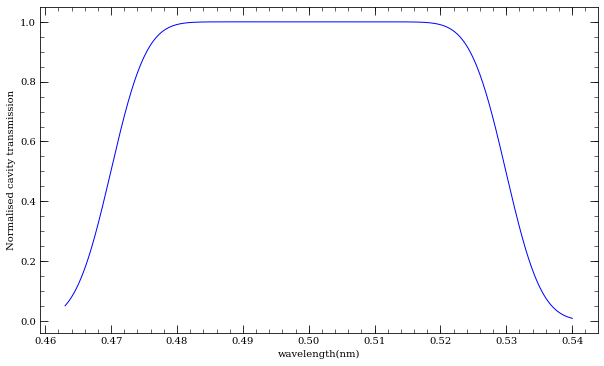

In [8]:
from scipy import interpolate
atom=Rubidium87()

# Rectangular function
y1= np.arange(0.44,0.55,0.0001);
sq=np.zeros(len(y1))
i1=int(len(y1)/2-300);
iend=int(len(y1)/2+300);

for i in range(i1,iend):
    sq[i]=1;

#Gaussian function
sigma=0.006   # width of the Gaussian function
guas=np.exp(-(y1-0.50)**2/sigma**2);

y_convolve = np.convolve(sq,guas,'same')
y_convolve=y_convolve/max(y_convolve)

tck = interpolate.splrep(y1, y_convolve, s=0)
y_cav= interpolate.splev(y, tck, der=0)

E_y = abs(atom.getEnergy(6,0,0.5))*1.6*1e-19 - y*abs(atom.getEnergy(6,0,0.5)-atom.getEnergy(60,2,2.5))*1.6*1e-19
λ_y = 6.63e-34*3e8/E_y*1e9

plt.figure(figsize=(10,6))
plt.plot(y,y_cav, color='blue', linewidth=1)
plt.xlabel('wavelength(nm)')
plt.ylabel('Normalised cavity transmission')

Now, we will add the contribution of the cavity part in the TPE calculation.

123.24920186123848


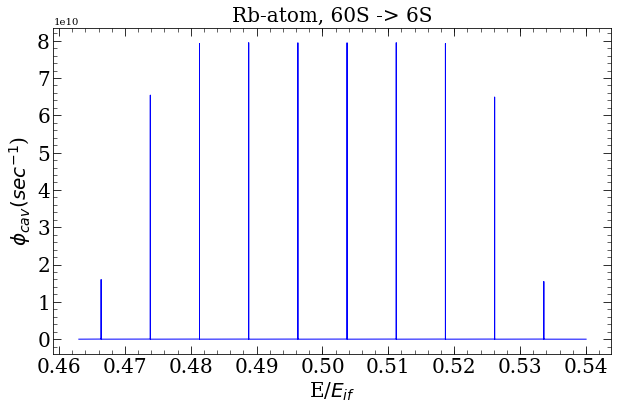

In [11]:
# This function calculates the each cavity mode
def f_cav(ν,νcn,Δν):
    #fc= 1/(pow((pow(ν,2)-pow(νcn,2))/(ν*Δν),2) + 1)*(1/(pow((pow(1-ν,2)-pow(1-νcn,2))/((1-ν)*Δν),2) + 1) + 1/(pow((pow(1-ν,2)-pow(νcn,2))/((1-ν)*Δν),2) + 1))
    fc= 1/(pow((pow(ν,2)-pow(νcn,2))/(ν*Δν),2) + 1)*(1/(pow((pow(1-ν,2)-pow(1-νcn,2))/((1-ν)*Δν),2) + 1))
    return(fc)

ωif = abs(atom.getEnergy(n2,l2,j2)-atom.getEnergy(n1,l1,j1))*e/ħ
λ_if = 2*π*c/ωif

#cavity parameters
κ=200e3 
y_FSR=0.00747;
R=50e-6;  #Radius of curvature of cavity mirror
L= 2*np.pi*3e8/(y_FSR*ωif);  # cavity length
#y_FSR = 2*np.pi*3e8/(L*ωif)
ν_FSR = c/(2*L);   # cavity free spectral range
ω0 = (2*λ_if/(2*np.pi))**0.5*(L*(2*R-L))**0.25   # beam waist
V =1/4*np.pi*pow(ω0,2)*L    # mode volume


coeff_cavity=9*pow(π,2)*1/pow((2*π),6)*pow((λ_if),6)/pow(V,2)


Δy_c=2*pi*κ/ωif 
sum_cav=0.0 
for n in range(1,20):
    #ycn = y[1]+n*0.01
    y1=((1-y_FSR)/2)-4*y_FSR;
    ycn = y1+(n-1)*y_FSR
    Qn = ycn/Δy_c * (1-ycn)/Δy_c
    sum_cav= sum_cav+(f_cav(y,ycn,Δy_c)*Qn*(1/ycn)*(1/(1-ycn)))

# TPE spectrum
sum_cav = y_cav*sum_cav    
phi = coefficient*coeff_cavity*pow(y,1)*pow((1-y),1)*(sumnr*sumnr)*sum_cav

# TPE rates
sum_int=0.0;
for i in range(1,len(y)-1):
    sum_int+=phi[i]*(y[i+1]-y[i-1])/2
Anr=sum_int/2

# Plot
plt.figure(figsize=(10,6))
plt.plot(y,phi, color='blue', linewidth=1)
plt.ylabel('$\phi_{cav} (sec^{-1}$)', fontsize = 20)
plt.xlabel('E/$E_{if}$',fontsize = 20)
plt.title('Rb-atom, 60S -> 6S',fontsize = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)
#plt.savefig('phi_free.pdf',dpi=100)

#np.savetxt('phi_k_20k_0.0074.dat', phi)
    
print(Anr)
